# <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW3. Master theorem and Linear Sorting

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from time import perf_counter

In [2]:
def generate_list(size, max):
    return [int(np.random.randint(0, max, dtype=np.uint64)) for x in range(size)]

In [3]:
def measure_runtime(function):
    def measure(*args, **kwargs):
        start = perf_counter()
        function(*args, **kwargs)
        end = perf_counter()
        return end - start
    return measure

In [4]:
def ex1(A, B, C):
    plt.subplots(figsize=(10, 10))
    n = np.linspace(1, 200, 400)
    plt.plot(n, [B(x) for x in n], label=f"$T(n) =  4T(n/2) + n$ - Case 2", linewidth=4, color="tab:orange")
    plt.plot(n, [(x ** 2) * math.log2(x) for x in n], label="$n^2log_2(n)$", linewidth=4, linestyle="dashed",
             color="red")
    plt.plot(n, [C(x) for x in n], label=f"$T(n) =  4T(n/2) + n^2$ - Case 3", linewidth=4, color="tab:green")
    plt.plot(n, [2 * x ** 2 for x in n], label="$2n^2$", linewidth=4, linestyle="dashed", color="darkgreen")
    plt.plot(n, [A(x) for x in n], label="$T(n) = 2T(n/2) + n$ - Case 1", linewidth=4, color="tab:blue")
    plt.plot(n, [x ** 2 for x in n], label="$n^2$", linewidth=4, linestyle="dashed", color="blue")
    plt.grid()
    plt.ylim(0, 80_000)
    plt.legend(prop={'size': 14})
    plt.title('Recurrent Functions + Approximations', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('y (operations)', fontsize=16)
    plt.show()

In [5]:
def ex2(T):
    plt.subplots(figsize=(10, 10))
    n = np.linspace(0, 10000, 500)
    plt.plot(n, [T(x) for x in n], label=f"$T(n) = T(n/2) + n(sin(n - pi/2) + 2)$", linewidth=2)
    plt.plot(n, [x for x in n], label=f"$n$", linewidth=4)
    plt.plot(n, [7 * x for x in n], label=f"$7n$", linewidth=4)
    plt.grid()
    plt.legend(prop={'size': 16})
    plt.title('Asymptotic Complexity of T(N)', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('y (operations)', fontsize=16)
    plt.show()

In [6]:
def ex3(linearSort):
    measure_linear = measure_runtime(linearSort)
    measure_builtin = measure_runtime(sorted)

    values = [2**8, 2**32, 2**64]
    value_labels = ["2^8", "2^{32}", "2^{64}"]
    input_sizes = [1000, 10_000, 15_000, 20_000, 25_000, 30_000, 35_000, 40_000, 45_000, 50_000]
    linear_time = {val:[] for val in values}
    builtin_time = {val:[] for val in values}

    for max_value in values:
        for size in input_sizes:
            average = 5
            builtin_time_avg = 0
            linear_time_avg = 0
            for i in range(average):
                array = generate_list(size=size, max=max_value)
                builtin_time_avg += measure_builtin(array)
                linear_time_avg += measure_linear(array)
            builtin_time[max_value].append(builtin_time_avg / average)
            linear_time[max_value].append(linear_time_avg / average)

    plt.subplots(figsize=(10, 10))
    for array, label in zip(values, value_labels):
        plt.plot(input_sizes, linear_time[array], label=f"Radix sort ${label}$", linewidth=4)
    for array, label in zip(values, value_labels):
        plt.plot(input_sizes, builtin_time[array], label=f"Builtin sort ${label}$", linewidth=4)

    plt.grid()
    plt.legend(prop={'size': 14})
    plt.title('Radix Sort vs Builtin TimSort', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('time (seconds)', fontsize=16)
    plt.show()

    for value, label in zip(values, value_labels):
        print(f"Radix sort {label} average time increase per 5000 input: {np.mean([linear_time[value][i] / linear_time[value][i-1] for i in range(2, len(linear_time[value]))]):.3f} times")
    for value, label in zip([(2**8, 2**32), (2**32, 2**64)], [("2^8", "2^{32}"), ("2^{32}", "2^{64}")]):
        print(f"Radix sort from {label[0]} to {label[1]} average time increase: {np.mean([linear_time[value[1]][i] / linear_time[value[0]][i] for i in range(2, len(linear_time[value[1]]))]):.3f} times")

    for value, label in zip(values, value_labels):
        print(f"Builtin sort {label} average time increase per 5000 input: {np.mean([builtin_time[value][i] / builtin_time[value][i-1] for i in range(2, len(builtin_time[value]))]):.3f} times")
    for value, label in zip(values, value_labels):
        print(f"For {label} builtin sort is {np.mean([linear_time[value][i] / builtin_time[value][i] for i in range(2, len(builtin_time[value]))]):.1f} times faster than radix sort")

In [7]:
def ex4and5(linear, radix, count, its_sorted):
    measure_linear = measure_runtime(linear)
    measure_radix = measure_runtime(radix)
    measure_radix2 = measure_runtime(radix)
    measure_counting = measure_runtime(count)
    measure_builtin = measure_runtime(sorted)
    measure_its_sorted = measure_runtime(its_sorted)

    input_sizes = [10_000, 100_000, 200_000, 300_000, 400_000, 500_000, 600_000, 700_000, 800_000, 900_000, 1_000_000]

    builtin_time= []
    linear_time= []
    radix_time= []
    radix_time2= []
    counting_time = []
    its_sorted_time = []

    for size in input_sizes:
        average = 5
        builtin_time_avg = 0
        linear_time_avg = 0
        radix_time_avg = 0
        radix_time2_avg = 0
        counting_time_avg = 0
        its_sorted_time_avg = 0
        for i in range(average):
            array = [x for x in range(size)]
            random.shuffle(array)
            single_digit_array = generate_list(size, 10)
            double_digit_array = generate_list(size, 100)
            binary_array = generate_list(size, 2)
            builtin_time_avg += measure_builtin(array)
            linear_time_avg += measure_linear(array)
            radix_time_avg += measure_radix(single_digit_array)
            radix_time2_avg += measure_radix2(double_digit_array)
            counting_time_avg += measure_counting(binary_array)
            its_sorted_time_avg += measure_its_sorted(binary_array)

        builtin_time.append(builtin_time_avg / average)
        linear_time.append(linear_time_avg / average)
        radix_time.append(radix_time_avg / average)
        radix_time2.append(radix_time2_avg / average)
        counting_time.append(counting_time_avg / average)
        its_sorted_time.append(its_sorted_time_avg / average)

    plt.subplots(figsize=(10, 10))

    plt.plot(input_sizes, linear_time, label=f"Based on length of input", linewidth=4)
    plt.plot(input_sizes, builtin_time, label=f"Builtin timsort", linewidth=4)
    plt.plot(input_sizes, radix_time, label=f"Radix sort - single digit array", linewidth=4)
    plt.plot(input_sizes, radix_time2, label=f"Radix sort - double digit array", linewidth=4)
    plt.plot(input_sizes, counting_time, label=f"Counting sort - binary array", linewidth=4)
    plt.plot(input_sizes, its_sorted_time, label=f"Already sorted", linewidth=4)

    plt.grid()
    plt.xticks(ticks=[10_000, 250_000, 500_000, 750_000, 1_000_000], labels=[f"{x:_}".replace("_", " ") for x in [10_000, 250_000, 500_000, 750_000, 1_000_000]])
    plt.legend(prop={'size': 14})
    plt.title('Beat Builtin Timsort', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('time (seconds)', fontsize=16)
    plt.show()

# EX1
##### Let’s check out the Master theorem. Give an example of a function for each of the three cases of the theorem. Solve those given recurrences using Master theorem (write down a, b, log_b(a). f(n)), and show how you decided which case the function is. Make sure to check the regularity condition if needed!

##### Plot your chosen functions, you can write a basic program as done previously, e.g. define a function to calculate $T(n) = a T(n/b) + f(n)$. You can assume again as in the previous week that $T(1)$ is $1$.

##### Case 1 - <font style="font-weight:normal"> If $f(n) = O(n^{log_b(a) - \varepsilon})$ for some constant $\varepsilon > 0$, then $T(n) = \Theta(n^{log_b(a)})$ </font>
$T = 4T(n/2) + n$. We have $a = 4$ (number of subproblems), $b = 2$ (size of each subproblem is n/b), $f(n) = n$, thus $log_{b}(a)= log_{2}(4) = 2 $. We have that  $n^{log_{b}(a)} = \Theta(n^2)$. Case 1 applies, because $f(n) = O(n^{log_{b}(a) - \varepsilon})$, where $\varepsilon = 1$. Therefore, we can conclude that $T(n) = \Theta(n^2)$.


##### Case 2 - <font style="font-weight:normal">If $f(n) = \Theta(n^{log_b(a)})$, then $T(n) = \Theta(n^{log_b(a)}log(n))$  </font>
$T(n) =  4T(n/2) + n^2$. We have $a = 4$ (number of subproblems), $b = 2$ (size of each subproblem is $n/b$), $f(n) = n^2$, thus $log_{b}(a)= log_{2}(4) = 2$. Case 2 applies, because $f(n) = n^{log_{b}(a)} = \Theta(n^2)$. Therefore, we can conclude that $T(n) = \Theta(n^2log(n))$.

##### Case 3 - <font style="font-weight:normal">If $f(n) = \Omega(n^{log_b(a) + \varepsilon})$ for some constant $\varepsilon > 0$, and if $af(n/b) <= cf(n)$ for some constanct $c>1$ and all sufficiently large $n$, then $T(n) = \Theta(f(n))$</font>
$T(n) =  2T(n/2) + n^2$. We have $a = 2$ (number of subproblems), $b = 2$ (size of each subproblem is $n/b$), $f(n) = 1$, thus $log_{b}(a)= log_{2}(2) = 1$. Since $f(n) = n^{log_{b}(a) + \varepsilon} = \Omega(n^2)$ , where $\varepsilon = 1$, case 3 applies if we can show that the regularity condition holds for $f(n)$. For sufficiently large $n$, we have that $af(n/b) = 2(n/2)^2 <= 0.5n^2 = cf(n)$ for $c = 0.5$. Therefore, we can conclude that $T(n) = \Theta(f(n)) = \Theta(n^2)$

##### Interpretation
I provided examples of recurrent functions for each case of the master theorem and solved them. I plotted the functions along with their approximations, that I got from applying master theorem. As can be seen from the plot, the approximation functions seem to have the same order of complexity as the recurrent functions, therefore the answers gotten from applying master theorem must be correct.


<font color="gray">Resource used: Introduction to Algorithms by (The MIT Press) Thomas H. Cormen, pages 94 - 96 </font>

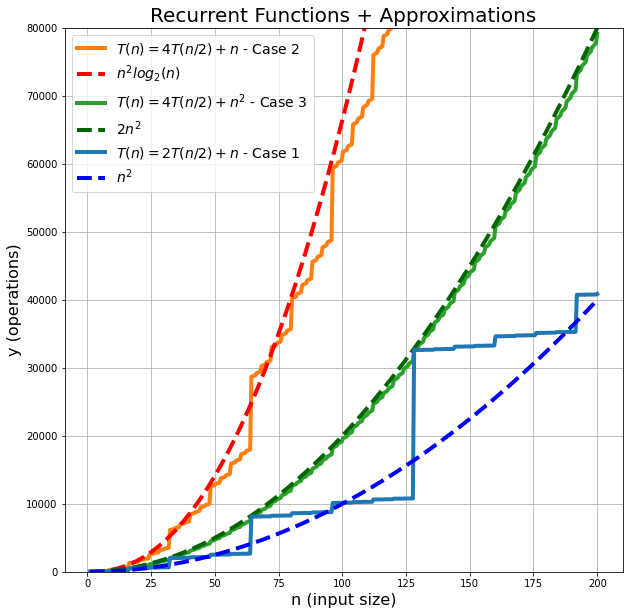

In [8]:
def A(n):  # Case 1 - blue
    return n if n <= 1 else A(n // 2) + A(n // 2) + A(n // 2) + A(n // 2) + n


def B(n):  # Case 2 - orange
    return n if n <= 1 else B(n // 2) + B(n // 2) + B(n // 2) + B(n // 2) + n ** 2


def C(n):  # Case 3 - green
    return n if n <= 1 else C(n // 2) + C(n // 2) + n ** 2


ex1(A, B, C)

# EX2
##### Sometimes the recurrent function is not so simple. Consider function T(n) = T(n/2) + n(sin(n - pi/2) + 2), pi = 3.141592…. (sin(x) takes radians as input). Can the Master theorem be applied here? If not, then why?



We have $a = 1$ (number of subproblems), $b = 2$ (size of each subproblem is $n/b$), $f(n) = n(sin(n - pi/2) + 2)$, thus $log_{b}(a)= log_{2}(1) = 0$. Since $f(n) = \Omega(n^{log_{b}(a) + \varepsilon})$, case 3 applies if we can show that the regularity condition holds for $f(n)$. We would need to show that for sufficiently large $n$, $af(n/b) = \frac{n}{2}(sin(\frac{n}{2} - pi/2) + 2) <= cn(sin(n - pi/2) + 2) = cf(n)$, where $c < 1$. However, there's no such $c$ and therefore the master theorem does not apply to the recurrence. Another reason why the master theorem can't be applied is because the function is not monotone.

##### Try to plot the function and try to provide some upper and lower bounds for its asymptotic complexity, feel free to use any of the methods available for you (e.g. plotting, proofs, ...).

I plotted the function and chose $f(n) = 7n$ for its upper bound and $f(n) = n$ for the lower bound. As can be seen from the plot, $T(n) = T(n/2) + n(sin(n - pi/2) + 2)$ is sandwiched between $f(n)= c n$, where $c_1 = 1$ and $c_2 = 7$. Therefore, we can conclude that $T(n) = T(n/2) + n(sin(n - pi/2) + 2) = \Theta(n)$.

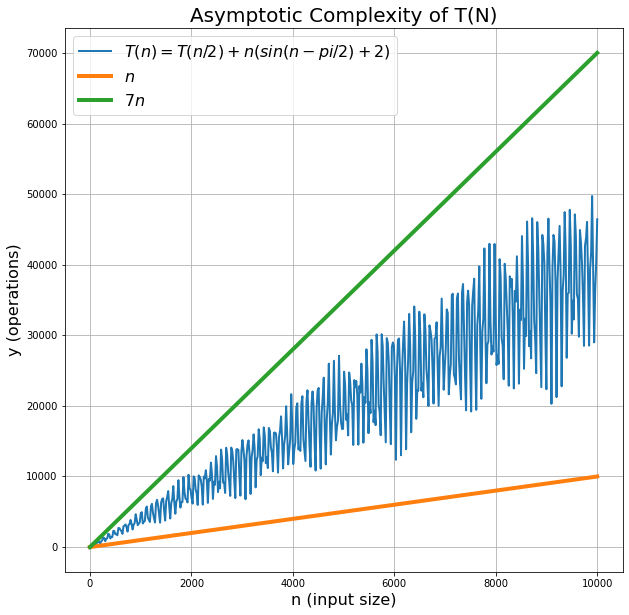

In [9]:
def T(n):
    return n if n <= 1 else T(n // 2) + n * (math.sin(n - math.pi / 2) + 2)

ex2(T)

# EX3
##### Implement and measure some linear-time sorting algorithm for 8, 32, and 64-bit unsigned (pseudo-)randomly generated integers (e.g. integers from [0,.. 2**32-1]), compare your implementation to the built-in sort times. Describe briefly the selected algorithm. Try to plot all 6 series of numbers (execution times for 8, 32 and 64-bit integers for both your and built-in sort) on one plot. Provide some constant factors by how much the speed differs roughly and comment on the result.

From linear sorting algorithms I chose radix sort. This implementation of radix sort starts sorting from the least significant digit to most significant digit, using counting sort to sort numbers at each step.

For input, I generated arrays with 10_000, 15_000, 20_000, 25_000, 30_000, 35_000, 40_000, 45_000, 50_000 random integers.
For integers up to $2^8$ the builtin sort was about 5 times faster.
For integers up to $2^{32}$ the builtin sort was about 10 times faster.
For integers up to $2^{64}$ the builtin sort was about 25 times faster.

Radix sort is great in a sense that it doesn't directly compare elements. But it's clear from the result, that radix sorts starts performing a lot worse sorting larger numbers. That's because the digits have to be sorted an additional time for every new digit.

<font color="gray">Based on pseudocode from Introduction to Algorithms by (The MIT Press) Thomas H. Cormen, page 195 and https://www.programiz.com/dsa/radix-sort</font>

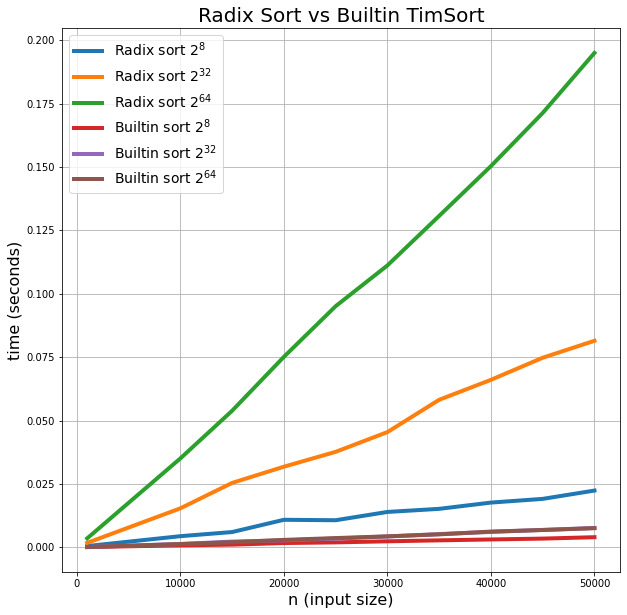

Radix sort 2^8 average time increase per 5000 input: 1.247 times
Radix sort 2^{32} average time increase per 5000 input: 1.242 times
Radix sort 2^{64} average time increase per 5000 input: 1.246 times
Radix sort from 2^8 to 2^{32} average time increase: 3.637 times
Radix sort from 2^{32} to 2^{64} average time increase: 2.333 times
Builtin sort 2^8 average time increase per 5000 input: 1.237 times
Builtin sort 2^{32} average time increase per 5000 input: 1.258 times
Builtin sort 2^{64} average time increase per 5000 input: 1.261 times
For 2^8 builtin sort is 5.8 times faster than radix sort
For 2^{32} builtin sort is 11.0 times faster than radix sort
For 2^{64} builtin sort is 25.8 times faster than radix sort


In [10]:
def radixSort(input_array):
    def sortByDigit(array, place): # counting sort
        output = [0] * len(array)
        count = [0] * 10

        # Calculate count of elements
        for item in array:
            count[item // place % 10] += 1

        # Calculate cumulative count
        for i in range(1, 10):
            count[i] += count[i-1]

        # Place the elements in sorted order
        for i in range(len(array) - 1, -1, -1):
            index = array[i] // place % 10
            output[count[index] -1] = array[i] # restore the elements to array
            count[index] -= 1 # decrease count of each element restored by 1
        return output

    arr = input_array
    place = 1
    for i in range(len(str(max(input_array)))):
        arr = sortByDigit(arr, place)
        place *= 10
    return arr

ex3(linearSort = radixSort)

# EX4 and EX5
##### In this task, you have the freedom to choose any method and tricks possible and try to work out as fast a sorting algorithm as possible. Try to beat your built-in sorting algorithm. You are also given the freedom of choice over the data you are sorting.

I measured the runtime of selected functions using input up to size 1_000_000.

With absolute control over the choice of input I could restrict the input to already sorted data. Then my algorithm could just return the input, knowing in advance that it's already sorted, thus having complexity of $\Theta(1)$. Therefore making it the best possible algorithm.
If I restrict the input to sequence {$n |$ where $n \in \mathbb{N}$ and  $n_0 = 0$ and $n_{k+1} = n_k + 1$} and randomize the order, then the algorithm would know the sorted array solely based on its length. It's just integers from 0 to n, because there are no duplicate elements. Both these algorithms beat bultin sort by a long shot, which is no surprise.

Using algorithms that actually sort the input instead of relying only on foreknowledge, I managed to beat builtin sort using both algorithms from ex3 - counting sort and radix sort. Radix sort outperformed builtin sort given only single digit numbers as input and already started to perform worse with double-digit numbers. Counting sort beat builtin sort given a binary array as input.


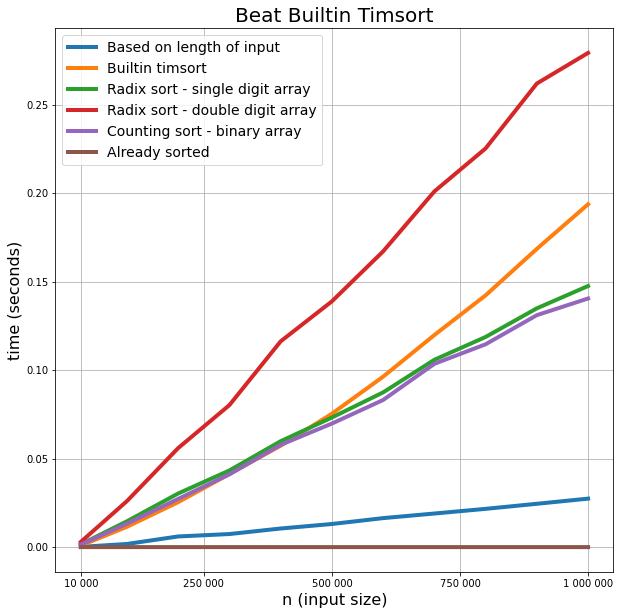

In [11]:
def its_sorted(array):
    return array

def based_on_length(array):
    return [x for x in range(len(array))]

def counting_sort(A):
    k = max(A)
    B = [0] * len(A)
    C = [0] * (k + 1)
    # Calculate count of elements
    for j in range(len(A)):
        C[A[j]] = C[A[j]] + 1
    # Calculate cumulative count
    for i in range(1, k+1):
        C[i] = C[i] + C[i-1]
    # Place the elements in sorted order
    for j in range(len(A) -1, -1, -1):
        B[C[A[j]]-1] = A[j] # restore the elements to array
        C[A[j]] = C[A[j]] -1 # decrease count of each element restored by 1
    return B

ex4and5(based_on_length, radixSort, counting_sort, its_sorted)

# EX6

##### Merge sort does not work 'in place' within the original space limits. The simple method uses double the memory by copying values to the helper table and back. There are some rather complicated constant memory overhead schemes to convert merge sort to work in-place, while still ensuring O(n log(n) ) worst-case (google). Your task is to experiment in practice with some simple, possibly non-optimal solution. Modify merge-sort to work in-place, possibly doing more the O(n) work for one merge operation. Measure the actual time on randomly generated data compared to more standard merge sort. Now try to break your own code by generating “worst possible” instances of data.

# <font size="20" color="red">TODO</font>

# EX7

##### The problem was formulated by M. I. Shamos and D. Hoey in the early 1970s, as part to compute efficient algorithms for basic computational primitives in geometry and found its uses into areas of graphics, computer vision, etc.

##### Given n points in the 1D plane, find the pair that is closest together in O(nlogn) time.

# <font size="20" color="red">TODO</font>